# Jednorozmerná diskrétna náhodná premenná

Predpokladajme, že máme konečnú postupnosť $X$, ktorá obsahuje $m$ hodnôt náhodnej premennej, $X=\{X_1, X_2,\, \dots  \, X_k, \, \dots \, X_m\}$.
Hodnota ľubovolného člena postupnosti $X$ patrí do rozsahu hodnôt, ktorý je daný $n$ diskrétnymi hodnotami $x = \{ x_0, x_1, \, \dots \, x_i, \, \dots \, x_n \} $.

Pravdepodobnosť $P(x_i)$  výskytu hodnoty $x_i$ v postupnosti $X$ je definovaná ako počet výskytov tejto hodnoty $q_i$ vzhľadom na celkový počet hodnôt v súbore $m$

\begin{equation}
P(x_i)  = \frac{q_i}{m}  
\end{equation}



  X  =  [3 1 2 3 5 5 0 2 5 4 2 1 2 5 5 5 0 2 2 1 2 1 3 3 2 3 2 5 0 2]
  xi =  3
  qi =  5
P(3) =  0.167


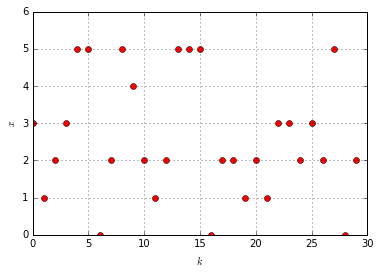

In [1]:
%reset -f  
%matplotlib inline

import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

# Priklad - Zobrazenie nahodnej premennej, vypocet pravdepodobnosti vyskytu P(xi)

m = 30                   # pocet hodnot X   
X = randint(6, size=m)   # vytvorenie pola X, int hodnoty z rozsahu 0...5, rovnomerne rozdelenie
xi = 3                   # zvolena hodnota nahodnej premennej
qi = sum(X==xi)          # vypocet pocetnosti vyskytu xi
Pi = qi / m              # vypocet pravdepodobnosti P(xi)

print('  X  = ', X)
print('  xi = ', xi)
print('  qi = ', qi)
print('P({0:1d}) =  {1:0.3f}'.format(xi, Pi))

plt.plot(X, 'ro')
plt.xlabel(r'$k$')
plt.ylabel(r'$x$')
plt.ylim(0,6)
plt.grid()
plt.show()

Charakteristickou hodnotou náhodnej premennej je stredná hodnota $E[X]$ (v literatúre označovaná aj ako <i>mean</i>, <i>excepted value</i>), štandardne označovaná aj ako $\mu$. Pre túto  môžeme písať 

\begin{equation}
\mu = E[X] = \frac{1}{m} \sum_{i=1}^n q_i \, x_i = \sum_{i=1}^n P(x_i) \, x_i 
\end{equation}

kde postupnosť $ \lbrace P(x_1), \, P(x_2) \dots \rbrace $ definuje rozdelenie pravdepodobností pre hodnoty $ \lbrace x_1, \, x_2 \dots \rbrace $. V literatúre sa používajú pre označenie strednej hodnoty aj symboly $\mathbb{E}[X]$, $E(X)$, $E(x)$, $\overline{X}$, $\overline{x}$

Označenie $E[X]$ môžeme pokladať aj za operátor nad postupnosťou $X$, t.j. násobenie prvkov argumentu operátora s pravdepodobnosťou ich výskytu a následnou sumáciou, napr.

\begin{equation}
E[Y + a] = \frac{1}{m} \sum_{i=1}^n q_i \, (y_i + a) = \sum_{i=1}^n P(y_i) \, (y_i + a) = \sum_{i=1}^n P(y_i) \, y_i + a \sum_{i=1}^n P(y_i) = E[Y] + a
\end{equation}

alebo

\begin{equation}
E[Z^3] = \frac{1}{m} \sum_{i=1}^n q_i \, (z_i^3) = \sum_{i=1}^n P(z_i) \, (z_i^3)
\end{equation}


In [2]:
# Priklad - Vypocet strednej hodnoty 

x = range(6)             # hodnoty xi [0, 1, ... 5]
q = np.zeros(6)          # hodnoty qi [0, 0,     0]
P = np.zeros(6)          # hodnoty pi [0, 0,     0]

for xi in x:
    q[xi] = sum(X==xi)
    P[xi] = q[xi] / m
    print('xi = {0:1d}    qi ={1:2.0f}    P({2:1d}) = {3:1.3f}'.format(xi, q[xi], xi, P[xi]))

mean = sum(P*x)
print()
print('      Mean = ', mean)
print('Numpy mean = ', np.mean(X))    # standard numpy function mean(x)

xi = 0    qi = 3    P(0) = 0.100
xi = 1    qi = 4    P(1) = 0.133
xi = 2    qi =10    P(2) = 0.333
xi = 3    qi = 5    P(3) = 0.167
xi = 4    qi = 1    P(4) = 0.033
xi = 5    qi = 7    P(5) = 0.233

      Mean =  2.6
Numpy mean =  2.6


Je zrejmé, že pre súčet hodnôt rozdelenia pravdepodobností platí

\begin{equation}
\sum_{i=1}^n P(x_i) = 1
\end{equation}

Závislosť $P(x_i)$ od $x_i$ môžeme pokladať za diskrétnu funkčnú závislosť, v ďaľšom označovanú ako rozdelovacia funkcia náhodnej premennej.

In [ ]:
print(sum(P))

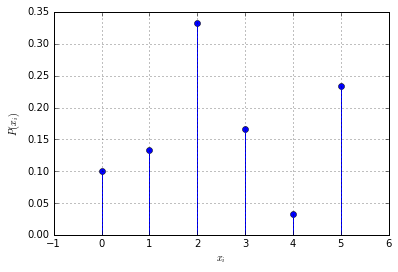

In [3]:
# Priklad - Zobrazenie zavislosti P(xi) od xi

plt.stem(x, P)
plt.grid()
plt.xlabel(r'$x_i$')
plt.ylabel(r'$P(x_i)$')
plt.xlim(x[0]-1, x[-1]+1)
plt.show()

Vlastnosti odchýlok náhodnej premennej $X$ od strednej hodnoty $\mu$ popisuje rozptyl (<i>variance</i>) $Var[X]$, v technickej praxi označovaný aj ako $\sigma^2$, ktorý je definovaný vzťahom (s uplatnením vlastností operátora $E[X]$ )

\begin{equation}
\nonumber
\sigma^2 = Var[X] =  E[(X-E[X])^2] = E[(X-\mu)^2] 
\end{equation}

Pri diskrétnom rozdelení vzťah pre rozptyl má tvar  

\begin{equation}
Var[X] =  E[(X-\mu)^2] = \frac{1}{m} \sum_{i=1}^n q_i \, (x_i - \mu)^2 = \sum_{i=1}^n P(x_i) \, (x_i - \mu)^2
\end{equation} 

Štandardná odchýlka (<i>standard deviation</i>) $\sigma$ je definovaná ako

\begin{equation}
\sigma = \sqrt{Var[X]} 
\end{equation}

In [5]:
# Priklad - Vypocet variancie a standardnej odchylky

variance = sum(P*(x - mean)**2)

print('      Variance =', variance)
print('Numpy Variance =', np.var(X))    # standard numpy function var(x)

std_dev = np.sqrt(variance)

print()
print('  Standard dev.=', std_dev)
print('Numpy std. dev.=', np.std(X))    # standard numpy function std(x)

      Variance = 2.57333333333
Numpy Variance = 2.57333333333

  Standard dev.= 1.6041612554
Numpy std. dev.= 1.6041612554


Na základe vlastností operátora $E[X]$ môžeme odvodiť nasledujúce vzťahy

\begin{equation}
E[c \, X] = c \, E[X]     
\end{equation}

\begin{equation}
E[X + c]  = E[X] + c       
\end{equation}

\begin{equation}
E[X + Y] = E[X] + E[Y]     
\end{equation}

\begin{equation}
E[a X + b] = a \, E[X] + b 
\end{equation}

\begin{equation}
E[(X-\mu)^2] =  E[X^2 - 2 X \mu + \mu^2]= E[X^2] - 2 \, E[X] \, \mu + \mu^2] = E[X^2] - 2 \mu^2 + \mu^2 =  E[X^2] - \mu^2 
\end{equation}

\begin{equation}
Var[\,c\,] = 0 \qquad (\overline{c} = c, \: c - \overline{c} = 0)
\end{equation}

\begin{equation}
Var[\,a \, X + c\,] = a^2 \, Var[X] 
\end{equation}


### Príklad - Náhodná premenná

Typickú náhodnú premennú s rovnomerným rozdelením získame pri hádzaní kocky, na kocke môžu padnúť hodnoty $X_i \in \{1,2,3,4,5,6\}$. Pri dostatočne veľkom počte pokusov, zistíme, že pravdepodobnosť pre každú hodnotu $x_i$ je rovnaká 

\begin{equation}
P(1) = P(2) = \dots = P(6) = \frac{1}{6}= 0.1666
\end{equation}

Ak hladáme pravdepodobnosť, s akou padne číslo 2 alebo 6, z vyššie uvedeného je zrejmé že

\begin{equation}
P(2,6) = \frac{1 + 1}{6}= 0.3333
\end{equation}

Pre strednú hodnotu $E[X]$ platí (stredná hodnota je vlastnosť náhodnej premennej, nie javu, ktorý popisuje)

\begin{equation}
E[X] = \frac{1 + 2 +3 +4 +5 +6 }{6} = 3.5 
\end{equation}

Pre rozptyl $Var[X]$ platí

\begin{equation}
Var[X] = \frac{(-2.5)^2 + (-1.5)^2 + (-0.5)^2 + 0.5^2 + 1.5^2 + 2.5^2 }{6} = 2.91 
\end{equation}

<i>Poznámka</i> 

Chuck Norris údajne dokázal pri nekonečnom počte hodov kockou hodiť samé šestky, sem tam aj sedmičku, pre takýto prípad platí rozdelenie pravdepodobnosti $p_{1 \dots 5}=0$ , $p_6=1$, $p_7 \neq 0$, $m \rightarrow \infty$

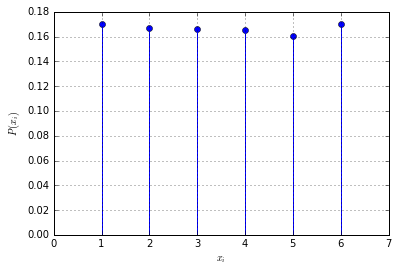

    Mean = 3.4903
Variance = 2.94750591
Std. dev.= 1.71683019254


In [6]:
# Priklad - Simulacia hodu kockou

m = 10000                    # pocet hodov kocky   
p = []
w = range(1,7)               # pole hodnot xi = 1...6
X = randint(1, 7, size=m)    # nahodna premenna X, rovnomerne rozdelenie
for xi in w:
    p.append(sum(X == xi)/m)

plt.stem(w, p)
plt.grid()
plt.xlim(0,7)
plt.xlabel(r'$x_i$')
plt.ylabel(r'$P \, (x_i)$')
plt.show()

print('    Mean =', np.mean(X))
print('Variance =', np.var(X))
print('Std. dev.=', np.std(X))

# Nezávislé náhodné premenné

Hodnoty niekoľkých štatisticky nezávislých premenných môžeme pokladať za špeciálny prípad reprezentácie n-rozmernej náhodnej premennej vo vektorovom tvare. Pre ilustráciu určime pravdepodobnosť, kedy pri hode dvoch kociek padne rovnaká hodnota.

Náhodná premenná X môže mať hodnoty

\begin{equation}
X = \{ [1,1], [1,2] \dots [1,6], [2,1], [2,2], \dots [6,5], [6,6] \}
\end{equation}

Celkový počet hodnôt $m = 36$, hladáme pravdepodobnosť výskytu stavov $q = \{[1,1], \dots [6,6] \}$ 

\begin{equation}
P(q) = \frac{6} {36} = 0.1666
\end{equation}


In [7]:
# Priklad - Simulacia hodu dvoma kockami

m = 10000                    # pocet sucasnych hodov kociek  
q = 0
X = randint(1, 7, size=m)    # kocka c. 1, nahodna premenna X
Y = randint(1, 7, size=m)    # kocka c. 2, nahodna premenna Y
for i in range(m):
    if X[i] == Y[i]:
        q+=1

print('P(q) = ', float(q)/m)

P(q) =  0.1684


# Podmienená pravdepodobnosť

Ak máme náhodnú premennú, v ktorej sa môžu vyskytovať javy $A$ a $B$ s pravdepodobnosťami $P(A)$ a $P(B)$, pričom $P(B) \neq 0$, potom o podmienenej pravdepodobnosti hovoríme vtedy, ak hladáme pravdepodobnosť výskytu javu $A$, ak nastal jav $B$.


\begin{equation}
P(A | B) = \frac{P (A \cap B)} {P(B)} 
\end{equation}

Určime pravdepodobnosť, že ak na kocke padne párne číslo (jav $B$), tak toto číslo bude 4 (jav $A$). 

Pravdepodobnosť javu $B$ je

\begin{equation}
P(B) = \frac { \{ 2,4,6 \} } { \{ 1,2,3,4,5,6 \} } = \frac {1}{2}
\end{equation}

Pravdepodobnosť javu $A$ je

\begin{equation}
P(A) = \frac { \{ 4 \} } { \{ 1,2,3,4,5,6 \} } = \frac {1}{6}
\end{equation}

Prienik $P (A \cap B)$ má hodnotu 

\begin{equation}
P (A \cap B) = \frac { \{ 2, 4, 6 \} } { \{ 1,2,3,4,5,6 \} }  \cap  \frac { \{ 4 \} } { \{ 1,2,3,4,5,6 \} } = \frac { \{ 4 \} }{ \{ 1,2,3,4,5,6 \} } = \frac{1}{6}
\end{equation}

Potom 

\begin{equation}
P(A | B) = \frac{P (A \cap B)} {P(B)} = \frac {1/6} {1/2} = 1/3
\end{equation}

In [8]:
m = 10000                    # pocet hodov kocky  
A = 0                        # pocetnost javu A
B = 0                        # pocetnost javu B
X = randint(1, 7, size=m)    # nahodna premenna X
for i in range(m):
    if X[i] in [2,4,6]:
        B+=1
        if X[i]== 4:
            A+=1

print('P(A|B) = ', float(A)/B)

P(A|B) =  0.3350670134026805


### Literatúra

Dokumentácia k štatistickým funkciám Numpy

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.statistics.html